Best minimum individual found: [-0.018517392250294085, 0.005985029167479339]
Minimum fitness: 0.00037871438988682985
Best maximum individual found: [-3.952207507019206, 3.657604092464885]
Maximum fitness: 28.998011875754845


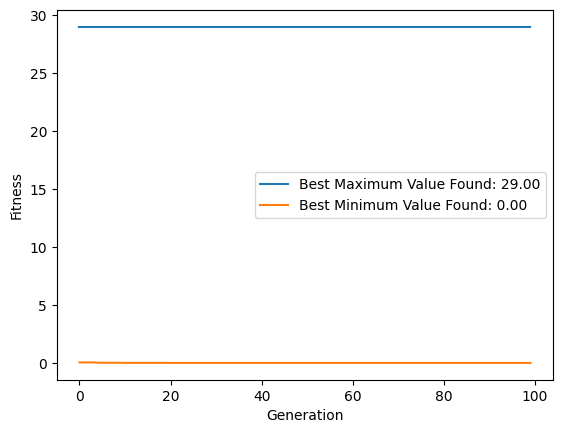

In [1]:
import random
import matplotlib.pyplot as plt

# problem constants
BOUND_LOW, BOUND_HIGH = -5, 5
POP_SIZE, N_GEN = 100, 100
CXPB, MUTPB = 0.5, 0.2

#  genetic algorithm components
def create_individual():
    """Create a random individual with values between BOUND_LOW and BOUND_HIGH."""
    return [random.uniform(BOUND_LOW, BOUND_HIGH), random.uniform(BOUND_LOW, BOUND_HIGH)]

def evaluate(individual):
    """Compute the fitness of an individual."""
    x, y = individual
    return x**2 + y**2

def select(population, k):
    """Select k individuals from the population using tournament selection."""
    chosen = []
    for i in range(k):
        candidates = random.sample(population, 2)
        chosen.append(min(candidates, key=evaluate))
    return chosen

def crossover(ind1, ind2):
    """Perform uniform crossover between two individuals."""
    return [ind1[i] if random.random() < 0.5 else ind2[i] for i in range(len(ind1))]

def mutate(individual):
    """Mutate an individual by adding a random Gaussian value to each gene."""
    return [max(BOUND_LOW, min(BOUND_HIGH, gene + random.gauss(0, 1))) for gene in individual]

# main genetic algorithm
def main():
    # initial population
    population = [create_individual() for _ in range(POP_SIZE)]

    # track best minimum and maximum values found
    best_min = float('inf')
    best_min_gen = 0
    best_min_ind = None
    best_max = float('-inf')
    best_max_gen = 0
    best_max_ind = None

    # evolve the population for N_GEN generations
    fitness_history_min = []
    fitness_history_max = []
    for gen in range(N_GEN):
        # select the next generation individuals
        offspring = select(population, len(population))
        # apply crossover and mutation operators
        offspring = [mutate(crossover(*select(offspring, 2))) for _ in range(len(population))]
        # evaluate the new generation
        fits = [evaluate(individual) for individual in offspring]
        # track best minimum and maximum values found
        min_fit = min(fits)
        if min_fit < best_min:
            best_min = min_fit
            best_min_gen = gen
            best_min_ind = offspring[fits.index(min_fit)]
        max_fit = max(fits)
        if max_fit > best_max:
            best_max = max_fit
            best_max_gen = gen
            best_max_ind = offspring[fits.index(max_fit)]
        fitness_history_min.append(best_min)
        fitness_history_max.append(best_max)
        # replace the current population with the new generation
        population = offspring

    # return the best individual found
    print("Best minimum individual found:", best_min_ind)
    print("Minimum fitness:", best_min)
    print("Best maximum individual found:", best_max_ind)
    print("Maximum fitness:", best_max)

    # plot the fitness histories
    plt.plot(fitness_history_max, label="Best Maximum Value Found")
    plt.plot(fitness_history_min, label="Best Minimum Value Found")

    plt.legend(('Best Maximum Value Found: %.2f' % best_max, 'Best Minimum Value Found: %.2f'  % best_min ))
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.show()

if __name__ == '__main__':
    main()